In [1]:
# https://ai.google/tools/datasets/google-facial-expression/
from EmotionData import EmotionData
import tensoflow.keras.models import Seque

In [2]:
data= pd.read_csv('data/fer2013.csv')
data.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [3]:
from PIL import Image
num_classes = 7
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

def preprocess(pixels):
    # get the laplacian
    original = np.mat(pixels).reshape(48, 48).astype(np.uint8)
    image = cv2.Laplacian(original, cv2.CV_64F)
    return original, image

Text(0.5, 1.0, 'Surprise')

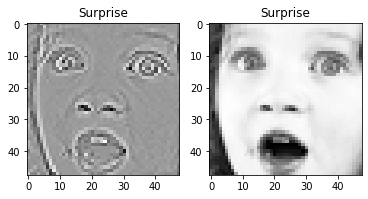

In [6]:
# get random row in dataframe
index = random.randint(1,30000)
pixels = data.pixels[index]
emotion = emotion_labels[data.emotion[index]]
original, laplacian = preprocess(pixels)

# plot the original image on right
fig, axs = plt.subplots(1,2)
axs[1].imshow(255 - original, cmap='Greys')
axs[1].set_title(emotion)

# and laplacian on the left
axs[0].imshow(laplacian, cmap='Greys')
axs[0].set_title(emotion)

In [8]:
# new labels
labels = pd.read_csv("data/labels_new.csv")
labels.head(10)

,Usage,Image name,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
0,Training,fer0000000.png,4,0,0,1,3,2,0,0,0,0
1,Training,fer0000001.png,6,0,1,1,0,0,0,0,2,0
2,Training,fer0000002.png,5,0,0,3,1,0,0,0,1,0
3,Training,fer0000003.png,4,0,0,4,1,0,0,0,1,0
4,Training,fer0000004.png,9,0,0,1,0,0,0,0,0,0
5,Training,fer0000005.png,6,0,0,1,0,0,1,1,1,0
6,Training,fer0000006.png,2,0,0,8,0,0,0,0,0,0
7,Training,fer0000007.png,0,10,0,0,0,0,0,0,0,0
8,Training,fer0000008.png,0,10,0,0,0,0,0,0,0,0
9,Training,fer0000009.png,0,0,6,0,0,0,4,0,0,0


(32, 48, 48) (32, 10)


[[0.  0.9 0.  0.  0.  0.  0.  0.  0.1 0. ]
 [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.9 0.  0.  0.  0.  0.  0.  0.1 0.  0. ]
 [0.8 0.  0.  0.  0.  0.  0.  0.1 0.1 0. ]
 [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.  0.1 0.  0.8 0.  0.  0.  0.  0. ]
 [0.1 0.8 0.1 0.  0.  0.  0.  0.  0.  0. ]
 [0.2 0.  0.  0.5 0.1 0.1 0.  0.1 0.  0. ]
 [0.3 0.7 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.4 0.  0.  0.5 0.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.  0.  0.8 0.  0.  0.  0.2 0. ]
 [0.7 0.  0.  0.3 0.  0.  0.  0.  0.  0. ]
 [0.1 0.  0.6 0.  0.  0.  0.1 0.  0.2 0. ]
 [0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.6 0.  0.  0.3 0.  0.  0.  0.  0.1 0. ]
 [0.2 0.  0.  0.8 0.  0.  0.  0.  0.  0. ]
 [0.7 0.  0.  0.2 0.1 0.  0.  0.  0.  0. ]
 [0.1 0.  0.3 0.1 0.  0.  0.5 0.  0.  0. ]
 [0.2 0.2 0.3 0.1 0.  0.1 0.1 0.  0.  0. ]
 [0.9 0.1 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.3 0